# Sentiment Analysis about Airlines

In this notebook, we want to know the analytical sentiment of Twitter users regarding airlines. Later this sentiment analysis will be useful for a company to be able to find out the shortcomings of their services and improve the quality of their work.

#### Importing needed packages

In [1]:
import pandas as pd 
import numpy as np
import tweepy as tp 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import textblob 
from textblob import TextBlob 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

#### Load Tweet data

In [7]:
df = pd.read_csv('tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567588278875213824,neutral,1.0,NaN,NaN,Delta,NaN,JetBlueNews,NaN,0,@JetBlue's new CEO seeks the right balance to ...,NaN,2015-02-16 23:36:05 -0800,USA,Sydney
1,567590027375702016,negative,1.0,Can't Tell,0.6503,Delta,NaN,nesi_1992,NaN,0,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,NaN,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada)
2,567591480085463040,negative,1.0,Late Flight,0.3460,United,NaN,CPoutloud,NaN,0,@united yes. We waited in line for almost an h...,NaN,2015-02-16 23:48:48 -0800,"Washington, DC",NaN
3,567592368451248130,negative,1.0,Late Flight,1.0000,United,NaN,brenduch,NaN,0,@united the we got into the gate at IAH on tim...,NaN,2015-02-16 23:52:20 -0800,NaN,Buenos Aires
4,567594449874587648,negative,1.0,Customer Service Issue,0.3451,Southwest,NaN,VahidESQ,NaN,0,@SouthwestAir its cool that my bags take a bit...,NaN,2015-02-17 00:00:36 -0800,"Los Angeles, CA",Pacific Time (US & Canada)


In [8]:
# Drop duplicate tweet 
g_unique = set()
for item in df['text']:
        g_unique.add(item)
tweet = []
for item in g_unique:
    tweet.append(item)
    dataframe = pd.DataFrame(tweet, columns = ['text'])

#### Lowercasing
Changing format to lowercase letters.

In [9]:
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dataframe['text'].head()

0    @usairways still waiting #brokenpromises #notn...
1    @usairways ! the worst in customer service. @u...
2    @southwestair you got me home over an hour and...
3    @usairways your service has been awful in bost...
4    @usairways suppose i need to tweet everyone ho...
Name: text, dtype: object

#### Removing punctuation
Cleaning the tweets from any punctuations.

In [10]:
dataframe['text'] = dataframe['text'].str.replace('[^\w\s]','')
dataframe.head()

,text
0,usairways still waiting brokenpromises notnice...
1,usairways the worst in customer service usair...
2,southwestair you got me home over an hour and ...
3,usairways your service has been awful in bosto...
4,usairways suppose i need to tweet everyone how...


#### Removing stopwords
A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [12]:
stop = stopwords.words('english')
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dataframe['text'].head(10)

0    usairways still waiting brokenpromises notnice...
1    usairways worst customer service usairways cal...
2    southwestair got home hour half late flight le...
3    usairways service awful boston pay 25 extra do...
4    usairways suppose need tweet everyone horrible...
5    united please moved seats lost upgrade seat 20...
6       united understood thanks tried reaching sooner
7    americanair understand need drain lavatory fea...
8                    jetblue leave certain things kids
9    usairways kind gentleman gate tells go left ge...
Name: text, dtype: object

#### Frequent words removal

In [13]:
freq = pd.Series(' '.join(dataframe['text']).split()).value_counts()[:10]
freq

united          4125
flight          3823
usairways       3036
americanair     2791
southwestair    2440
jetblue         2349
get             1326
cancelled       1034
thanks          1030
service          948
dtype: int64

In [14]:
freq = list(freq.index)
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dataframe['text'].head()

0    still waiting brokenpromises notnice neveragai...
1    worst customer calling month book poorcustomer...
2    got home hour half late least baggage delivere...
3    awful boston pay 25 extra dollars supposed dis...
4    suppose need tweet everyone horrible airline t...
Name: text, dtype: object

#### Removing rare words

In [15]:
rare_word = pd.Series(' '.join(dataframe['text']).split()).value_counts()[-10:]
rare_word

breathe              1
centric              1
dualcam              1
45minhour            1
irony                1
26min                1
prerecorded          1
genious              1
cri                  1
httptco8dqzlrjo9p    1
dtype: int64

In [16]:
rare_word = list(rare_word.index)
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
dataframe['text'].head()

0    still waiting brokenpromises notnice neveragai...
1    worst customer calling month book poorcustomer...
2    got home hour half late least baggage delivere...
3    awful boston pay 25 extra dollars supposed dis...
4    suppose need tweet everyone horrible airline t...
Name: text, dtype: object

#### Spelling correction

In [17]:
dataframe['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    still waiting brokenpromises notice neveragain...
1    worst customer calling month book poorcustomer...
2    got home hour half late least baggage delivere...
3    awful boston pay 25 extra dollars supposed dis...
4    suppose need sweet everyone horrible airline t...
Name: text, dtype: object

#### Tokenization
Tokenization is the process of replacing sensitive data with unique identification symbols that retain all the essential information about the data without compromising its security.

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [19]:
TextBlob(dataframe['text'][1]).words

WordList(['worst', 'customer', 'calling', 'month', 'book', 'poorcustomerservice', 'usairwaysfflyer'])

#### Stemming
Stemming algorithms work by cutting off the end or the beginning of the word, taking into account a list of common prefixes and suffixes that can be found in an inflected word. This indiscriminate cutting can be successful in some occasions, but not always, and that is why we affirm that this approach presents some limitations.

In [20]:
st = PorterStemmer()
dataframe['text'] = dataframe['text'][:].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [21]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567588278875213824,neutral,1.0,NaN,NaN,Delta,NaN,JetBlueNews,NaN,0,@JetBlue's new CEO seeks the right balance to ...,NaN,2015-02-16 23:36:05 -0800,USA,Sydney
1,567590027375702016,negative,1.0,Can't Tell,0.6503,Delta,NaN,nesi_1992,NaN,0,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,NaN,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada)
2,567591480085463040,negative,1.0,Late Flight,0.3460,United,NaN,CPoutloud,NaN,0,@united yes. We waited in line for almost an h...,NaN,2015-02-16 23:48:48 -0800,"Washington, DC",NaN
3,567592368451248130,negative,1.0,Late Flight,1.0000,United,NaN,brenduch,NaN,0,@united the we got into the gate at IAH on tim...,NaN,2015-02-16 23:52:20 -0800,NaN,Buenos Aires
4,567594449874587648,negative,1.0,Customer Service Issue,0.3451,Southwest,NaN,VahidESQ,NaN,0,@SouthwestAir its cool that my bags take a bit...,NaN,2015-02-17 00:00:36 -0800,"Los Angeles, CA",Pacific Time (US & Canada)


#### Lematization
Lemmatization, on the other hand, takes into consideration the morphological analysis of the words. To do so, it is necessary to have detailed dictionaries which the algorithm can look through to link the form back to its lemma. 

In [22]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [23]:
from textblob import Word
dataframe['text'] = dataframe['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
dataframe['text'].head()

0    still wait brokenpromis notnic neveragain tell...
1    worst custom call month book poorcustomerservi...
2    got home hour half late least baggag deliv soa...
3    aw boston pay 25 extra dollar suppos dissatisf...
4    suppos need tweet everyon horribl airlin take ...
Name: text, dtype: object

In [24]:
dataframe.head()

,text
0,still wait brokenpromis notnic neveragain tell...
1,worst custom call month book poorcustomerservi...
2,got home hour half late least baggag deliv soa...
3,aw boston pay 25 extra dollar suppos dissatisf...
4,suppos need tweet everyon horribl airlin take ...


### Feature extraction 

#### Number of words

In [25]:
dataframe['word_count'] = dataframe['text'].apply(lambda x: len(str(x).split(" ")))
dataframe.head()

,text,word_count
0,still wait brokenpromis notnic neveragain tell...,6
1,worst custom call month book poorcustomerservi...,7
2,got home hour half late least baggag deliv soa...,10
3,aw boston pay 25 extra dollar suppos dissatisf...,9
4,suppos need tweet everyon horribl airlin take ...,11


#### Number of characters

In [26]:
dataframe['char_count'] = dataframe['text'].str.len()
dataframe.head()

,text,word_count,char_count
0,still wait brokenpromis notnic neveragain tell...,6,55
1,worst custom call month book poorcustomerservi...,7,61
2,got home hour half late least baggag deliv soa...,10,51
3,aw boston pay 25 extra dollar suppos dissatisf...,9,51
4,suppos need tweet everyon horribl airlin take ...,11,64


#### Number of stopwords

In [27]:
stop = stopwords.words('english')
dataframe['stopwords'] = dataframe['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
dataframe.head()

,text,word_count,char_count,stopwords
0,still wait brokenpromis notnic neveragain tell...,6,55,0
1,worst custom call month book poorcustomerservi...,7,61,0
2,got home hour half late least baggag deliv soa...,10,51,0
3,aw boston pay 25 extra dollar suppos dissatisf...,9,51,0
4,suppos need tweet everyon horribl airlin take ...,11,64,0


#### Number of special characters

In [28]:
dataframe['hastags'] = dataframe['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
dataframe.head()

,text,word_count,char_count,stopwords,hastags
0,still wait brokenpromis notnic neveragain tell...,6,55,0,0
1,worst custom call month book poorcustomerservi...,7,61,0,0
2,got home hour half late least baggag deliv soa...,10,51,0,0
3,aw boston pay 25 extra dollar suppos dissatisf...,9,51,0,0
4,suppos need tweet everyon horribl airlin take ...,11,64,0,0


In [29]:
dataframe

,text,word_count,char_count,stopwords,hastags
0,still wait brokenpromis notnic neveragain tell...,6,55,0,0
1,worst custom call month book poorcustomerservi...,7,61,0,0
2,got home hour half late least baggag deliv soa...,10,51,0,0
3,aw boston pay 25 extra dollar suppos dissatisf...,9,51,0,0
4,suppos need tweet everyon horribl airlin take ...,11,64,0,0
...,...,...,...,...,...
14422,best agent could put arriv tomorrow afternoon ...,10,60,0,0
14423,cant thru anyon phone,4,21,0,0
14424,lose bag 4 daysampcharg 475 toarrang pick upin...,13,88,0,0
14425,got hot ladi fli air life loyal,7,31,0,0


### Data Visualization 

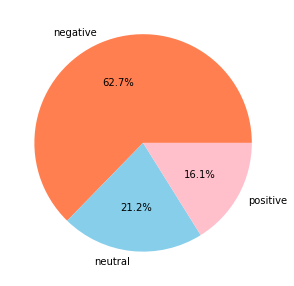

In [30]:
sentiment = df['airline_sentiment'].value_counts()
colors = ['coral', 'skyblue', 'pink']

plt.figure(figsize=(5,5))
plt.pie(sentiment, labels=sentiment.index, autopct='%1.1f%%', colors=colors)
plt.show()

From the pie chart above, we can see that the negative sentiment is dominated. This should be a "warning" for airlines to improve their quality.

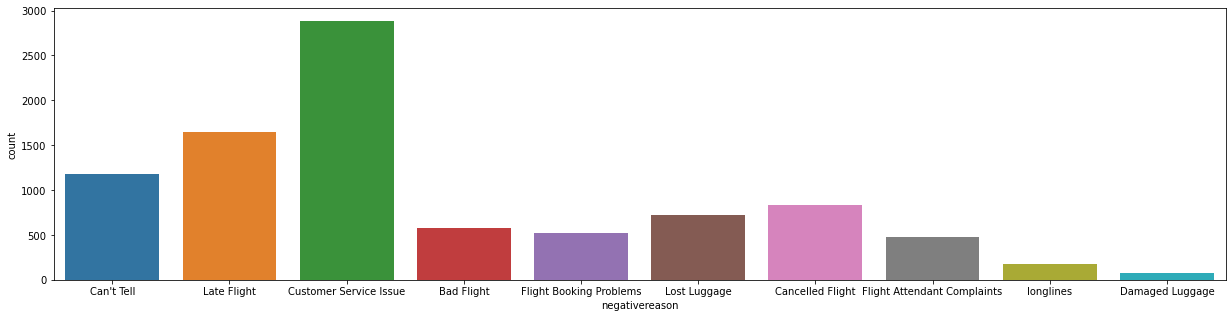

In [31]:
plt.figure(figsize=(21,5))
sns.countplot(df['negativereason'])

Here are the negative reasons from customers. It can be seen that most of the problems are related to *customer service*. The airline should improve its customer service. For example, 24-hour standby to answer customer questions, or maybe it could provide a social media bot so there is no need for workers to work late at night but customer questions can still be answered.

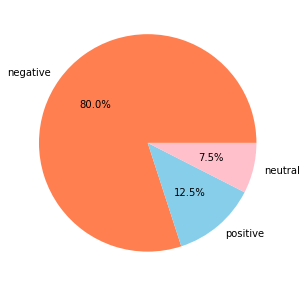

In [32]:
sentiment_gold = df['airline_sentiment_gold'].value_counts()
colors = ['coral', 'skyblue', 'pink']

plt.figure(figsize=(5,5))
plt.pie(sentiment_gold, labels=sentiment_gold.index, autopct='%1.1f%%', colors=colors)
plt.show()

This pie chart shows the sentiment of a gold class airline. It can be seen that there are more negative sentiments, up to 80%. The airline should improve the quality of their service for this gold class passenger in order to avoid dissatisfaction from customers.

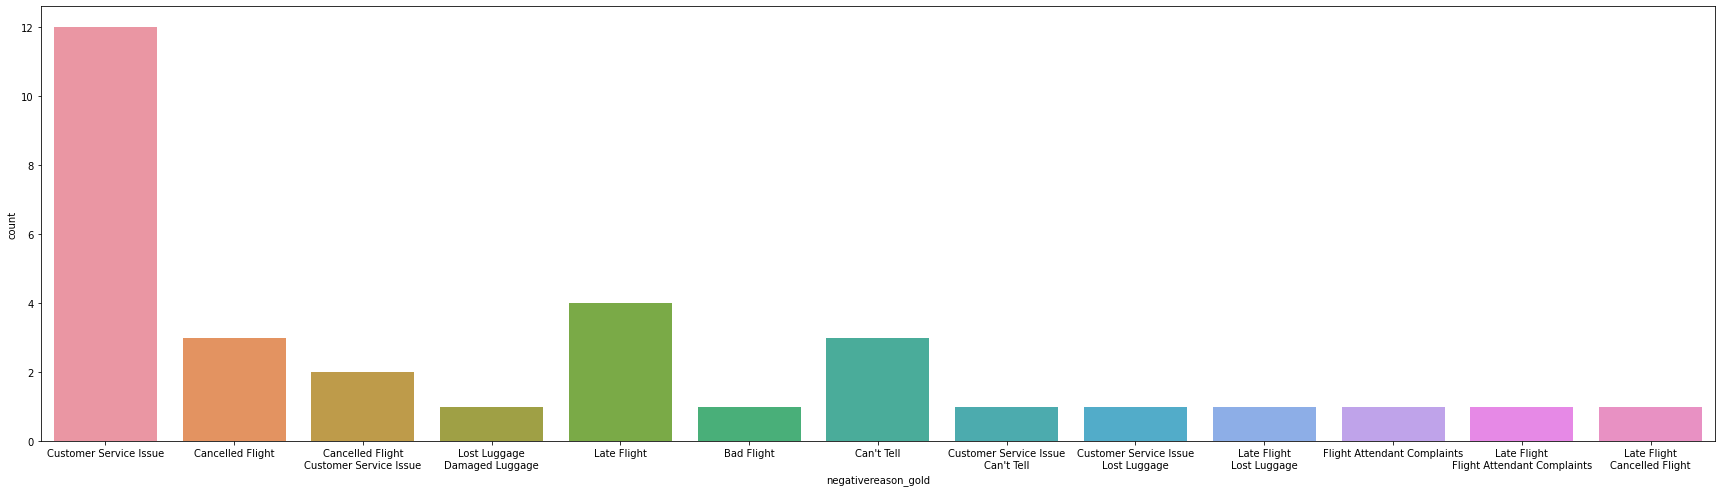

In [33]:
plt.figure(figsize=(30,8))
sns.countplot(df['negativereason_gold'])

The bar chart above is the reason for negative sentiment on gold class airlines. It can be seen that the most commented on is customer service issues. The airline should provide better service for gold class customers, for example by being a proactive customer service to customers such as reminding flight schedule.

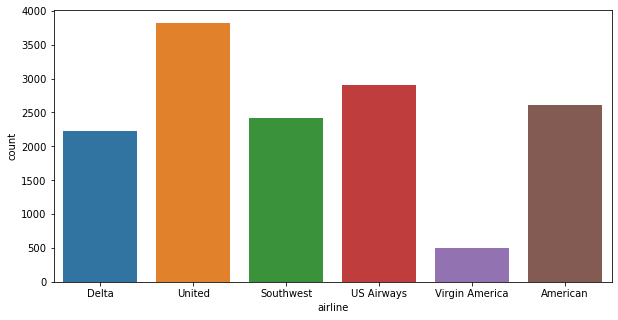

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(df['airline'])

In [35]:
# The most locations where these users provide their responses via Twitter
df['tweet_location'].mode()

0    Boston, MA
dtype: object

In [36]:
# The most used timezone by users when they send tweets
df['user_timezone'].mode()

0    Eastern Time (US & Canada)
dtype: object

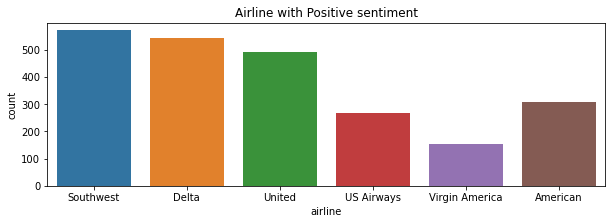

In [37]:
# Which airlines get the most positive sentiment?
result = df[df.airline_sentiment == 'positive']
positive = result[['airline_sentiment', 'airline']]
plt.figure(figsize=(10,3))
plt.title('Airline with Positive sentiment')
sns.countplot(positive['airline'])

The bar plot below is trying to find out the reasons for negative users shared about soutwest airlines. Even though these airlines get the most positive sentiments, they cannot be satisfied because there is still negative sentiment given to the airlines. The reason most comments by customers are regarding customer service problems.

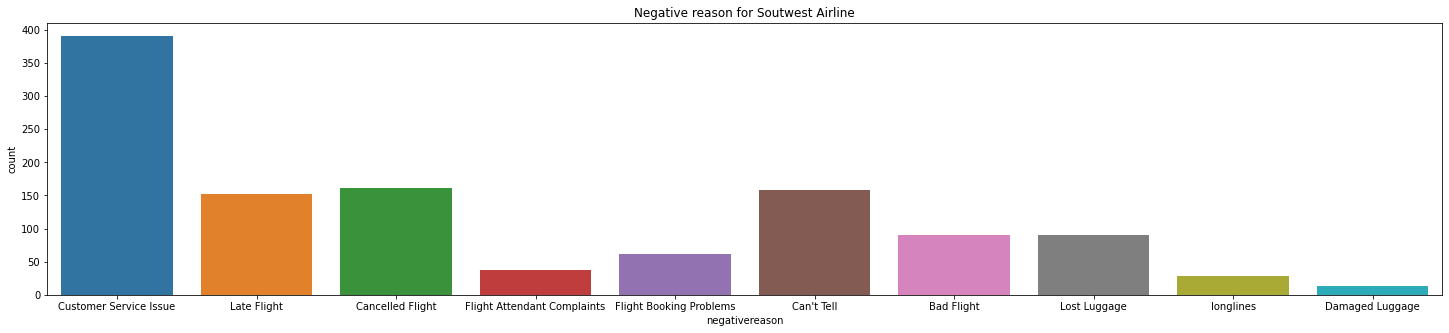

In [38]:
airline = df[df.airline == 'Southwest']
negreason = airline[['airline', 'negativereason']]
plt.figure(figsize=(25,5))
plt.title('Negative reason for Soutwest Airline')
sns.countplot(negreason['negativereason'])

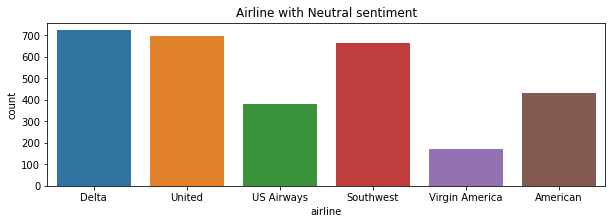

In [39]:
# Which airlines get the most neutral sentiment?
result = df[df.airline_sentiment == 'neutral']
neutral = result[['airline_sentiment', 'airline']]
plt.figure(figsize=(10,3))
plt.title('Airline with Neutral sentiment')
sns.countplot(neutral['airline'])

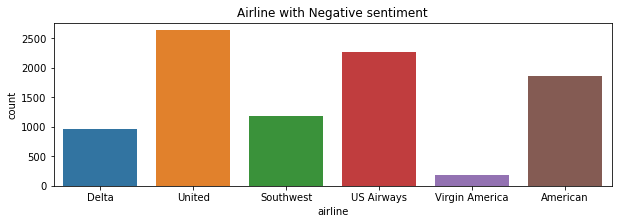

In [40]:
# Which airlines get the most negative sentiments?
result2 = df[df.airline_sentiment == 'negative']
negative = result2[['airline_sentiment', 'airline']]
plt.figure(figsize=(10,3))
plt.title('Airline with Negative sentiment')
sns.countplot(negative['airline'])

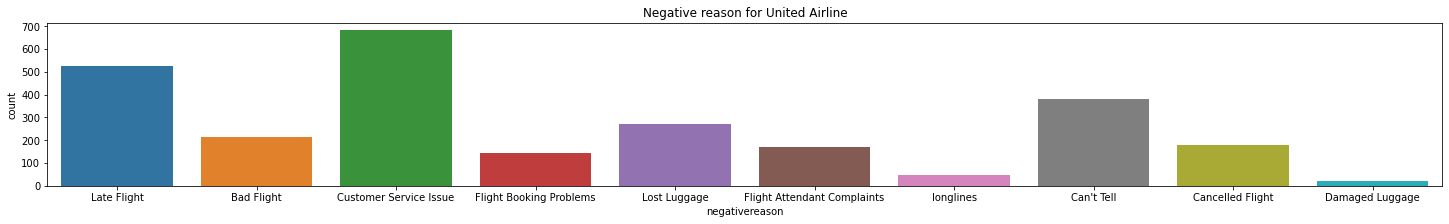

In [42]:
airline = df[df.airline=='United']
negreason = airline[['negativereason','airline']]
plt.figure(figsize=(25,3))
plt.title('Negative reason for United Airline')
sns.countplot(negreason['negativereason'])

A bar plot above find out the reasons why customers give negative sentiment the most. It is known that United airlines experience *frequent flight delays* so that customers are not satisfied. Therefore, United airlines need to change their flight system. The airline must find out in advance why there is a delay, after that it must be resolved immediately so that there will be no more delays.

### Wordcloud

In [43]:
from wordcloud import WordCloud, STOPWORDS

In [44]:
desc = "".join(df.text.values)

In [45]:
def create_word_cloud(string):
    cloud = WordCloud(background_color="white", max_words=200, stopwords=set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

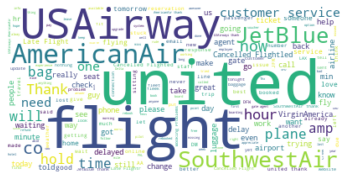

In [46]:
create_word_cloud(desc)

### Conclusion

In this case, sentiment analysis is used to determine user responses or reviews regarding several airlines. With this sentiment analysis, airlines can improve their systems, facilities, services, and others to increase user satisfaction. So, there will be no negative sentiments about the airline.

In addition for this case, we added a word cloud which to visualize the text data. It's usually used to describe the metadata of keywords (tags) on a website, to visualize a form of text freely. The most used word by users is the word 'flight'.

### References :
- [tokenization](https://searchsecurity.techtarget.com/definition/tokenization)
- [Removing stop words with NLTK in Python](https://www.geeksforgeeks.org/removing-stop-words-nltk-python/)
- [What is the difference between stemming and lemmatization?](https://blog.bitext.com/what-is-the-difference-between-stemming-and-lemmatization/)